## Exercici 1
Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [ ]:
CREATE DATABASE IF NOT EXISTS Cine;

USE Cine;

CREATE TABLE Pelicula (
    id INT AUTO_INCREMENT PRIMARY KEY,
    titulo VARCHAR(100),
    fecha_estreno YEAR(4),
    genero VARCHAR(100),
    recaudacion_millones DECIMAL
);

CREATE TABLE Critica (
    id INT AUTO_INCREMENT PRIMARY KEY,
    nombre VARCHAR(100),
    apellido VARCHAR(100)
);

CREATE TABLE Rating (
    idPelicula INT,
    idCritica INT,
    rating DECIMAL(2,1),
    FOREIGN KEY(idPelicula) REFERENCES Pelicula(id),
    FOREIGN KEY(idCritica) REFERENCES Critica(id),
    PRIMARY KEY(idPelicula, idCritica)
);

INSERT INTO Pelicula (titulo, fecha_estreno, genero, recaudacion_millones)
VALUES
    ("Forrest Gump", 1994, "Drama", 330.2),
    ("3 Idiots", 2009, "Drama", 2.4),
    ("Eternal Sunshine of the Spotless Mind", 2004, "Drama", 34.5),
    ("Good Will Hunting", 1997, "Drama", 138.1),
    ("Skyfall", 2012, "Action", 304.6),
    ("Gladiator", 2000, "Action", 188.7),
    ("Black", 2005, "Drama", 3.0),
    ("Titanic", 1997, "Romance", 659.2),
    ("The Shawshank Redemption", 1994, "Drama",28.4),
    ("Udaan", 2010, "Drama", 1.5),
    ("Home Alone", 1990, "Comedy", 286.9),
    ("Casablanca", 1942, "Romance", 1.0),
    ("Avengers: Endgame", 2019, "Action", 858.8),
    ("Night of the Living Dead", 1968, "Horror", 2.5),
    ("The Godfather", 1972, "Crime", 135.6),
    ("Haider", 2014, "Action", 4.2),
    ("Inception", 2010, "Adventure", 293.7),
    ("Evil", 2003, "Horror", 1.3),
    ("Toy Story 4", 2019, "Animation", 434.9),
    ("Air Force One", 1997, "Drama", 138.1),
    ("The Dark Knight", 2008, "Action",535.4),
    ("Bhaag Milkha Bhaag", 2013, "Sport", 4.1),
    ("The Lion King", 1994, "Animation", 423.6),
    ("Pulp Fiction", 1994, "Crime", 108.8),
    ("Kai Po Che", 2013, "Sport", 6.0),
    ("Beasts of No Nation", 2015, "War", 1.4),
    ("Andadhun", 2018, "Thriller", 2.9),
    ("The Silence of the Lambs", 1991, "Crime", 68.2),
    ("Deadpool", 2016, "Action", 363.6),
    ("Drishyam", 2015, "Mystery", 3.0);
    
INSERT INTO Critica (nombre, apellido) 
VALUES
	("Chaitanya", "Baweja"),
    ("Mary", "Cooper"),
    ("John", "Wayne"),
    ("Thomas", "Stoneman"),
    ("Penny", "Hofstadter"),
    ("Mitchell", "Marsh"),
    ("Wyatt", "Skaggs"),
    ("Andre", "Veiga"),
    ("Sheldon", "Cooper"),
    ("Kimbra", "Masters"),
    ("Kat", "Dennings"),
    ("Bruce", "Wayne"),
    ("Domingo", "Cortes"),
    ("Rajesh", "Koothrappali"),
    ("Ben", "Glocker"),
    ("Mahinder", "Dhoni"),
    ("Akbar", "Khan"),
    ("Howard", "Wolowitz"),
    ("Pinkie", "Petit"),
    ("Gurkaran", "Singh"),
    ("Amy", "Farah Fowler"),
    ("Marlon", "Crafford");
    
INSERT INTO Rating (rating, idPelicula, idCritica)
VALUES
	(6.4, 17, 5), (5.6, 19, 1), (6.3, 22, 14), (5.1, 21, 17),
    (5.0, 5, 5), (6.5, 21, 5), (8.5, 30, 13), (9.7, 6, 4),
    (8.5, 24, 12), (9.9, 14, 9), (8.7, 26, 14), (9.9, 6, 10),
    (5.1, 30, 6), (5.4, 18, 16), (6.2, 6, 20), (7.3, 21, 19),
    (8.1, 17, 18), (5.0, 7, 2), (9.8, 23, 3), (8.0, 22, 9),
    (8.5, 11, 13), (5.0, 5, 11), (5.7, 8, 2), (7.6, 25, 19),
    (5.2, 18, 15), (9.7, 13, 3), (5.8, 18, 8), (5.8, 30, 15),
    (8.4, 21, 18), (6.2, 23, 16), (7.0, 10, 18), (9.5, 30, 20),
    (8.9, 3, 19), (6.4, 12, 2), (7.8, 12, 22), (9.9, 15, 13),
    (7.5, 20, 17), (9.0, 25, 6), (8.5, 23, 2), (5.3, 30, 17),
    (6.4, 5, 10), (8.1, 5, 21), (5.7, 22, 1), (6.3, 28, 4),
    (9.8, 13, 1);

In [28]:
from getpass import getpass
import mysql.connector

config = {
  'user': '',
  'password': '',
  'host': '127.0.0.1',
  'database': 'Cine',
  'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

## Exercici 2
Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe

In [41]:
import pandas as pd

generos_mas_populares = pd.read_sql(
    """
    SELECT genero, COUNT(*) as num_peliculas 
    FROM Pelicula 
    GROUP BY genero 
    ORDER BY num_peliculas DESC
    LIMIT 3
    """, 
    cnx
)

display(genero_mas_popular)

,genero,num_peliculas
0,Drama,8
1,Action,6
2,Crime,3
3,Romance,2
4,Horror,2
5,Animation,2
6,Sport,2
7,Comedy,1
8,Adventure,1
9,War,1


In [30]:
pelis_por_fecha = pd.read_sql(
    """
    SELECT fecha_estreno, COUNT(*) as num_peliculas 
    FROM Pelicula 
    GROUP BY fecha_estreno 
    ORDER BY fecha_estreno ASC
    """, 
    cnx
)

display(pelis_por_fecha)

,fecha_estreno,num_peliculas
0,1942,1
1,1968,1
2,1972,1
3,1990,1
4,1991,1
5,1994,4
6,1997,3
7,2000,1
8,2003,1
9,2004,1


In [31]:
pelis_mas_taquilleras = pd.read_sql(
    """
    SELECT titulo, recaudacion_millones 
    FROM Pelicula 
    ORDER BY recaudacion_millones DESC
    LIMIT 3
    """, 
    cnx
)

display(pelis_mas_taquilleras)

,titulo,recaudacion_millones
0,Avengers: Endgame,859.0
1,Titanic,659.0
2,The Dark Knight,535.0


In [36]:
criticas_mas_duras = pd.read_sql(
    """
    SELECT nombre, apellido, AVG(rating) as media_ratings
    FROM Critica c
    JOIN Rating r ON c.id = r.idCritica
    GROUP BY c.id
    ORDER BY media_ratings ASC
    LIMIT 3
    """, 
    cnx
)

display(criticas_mas_duras)

,nombre,apellido,media_ratings
0,Kat,Dennings,5.0
1,Ben,Glocker,5.5
2,Andre,Veiga,5.8


In [44]:
pelis_mejor_valoradas = pd.read_sql(
    """
    SELECT p.titulo, ROUND(AVG(r.rating), 2) as media_ratings
    FROM Rating r
    JOIN Pelicula p ON p.id = r.idCritica
    GROUP BY p.titulo
    ORDER BY media_ratings DESC
    LIMIT 3
    """, 
    cnx
)

display(pelis_mejor_valoradas)

,titulo,media_ratings
0,Eternal Sunshine of the Spotless Mind,9.75
1,Avengers: Endgame,8.97
2,The Shawshank Redemption,8.95


## Exercici 3
Genera algun gràfic que resumeixi les dades

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

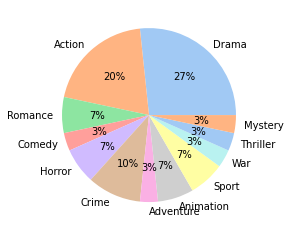

In [115]:
generos = pd.read_sql(
    """
    SELECT genero, COUNT(*) as num_peliculas 
    FROM Pelicula 
    GROUP BY genero 
    """, 
    cnx
)

palette_color = sns.color_palette('pastel')
plt.pie(generos['num_peliculas'], labels=generos['genero'], colors=palette_color, autopct='%.0f%%')
plt.show()

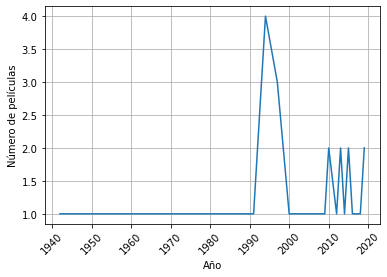

In [206]:
generos = pd.read_sql(
    """
    SELECT fecha_estreno as fecha, COUNT(*) as num_peliculas 
    FROM Pelicula 
    GROUP BY fecha
    """, 
    cnx
)


ax = sns.lineplot(data=generos, x="fecha", y="num_peliculas")
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.grid()
plt.show()

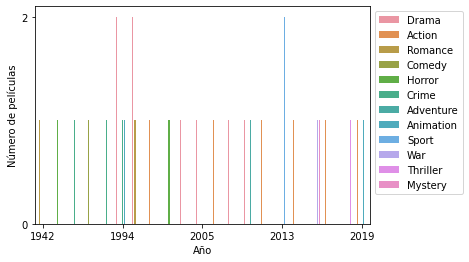

In [111]:
generos = pd.read_sql(
    """
    SELECT genero, fecha_estreno as fecha, COUNT(*) as num_peliculas 
    FROM Pelicula 
    GROUP BY fecha, genero 
    """, 
    cnx
)

ax = sns.barplot(data=generos, x="fecha", y="num_peliculas", hue="genero")
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.show()

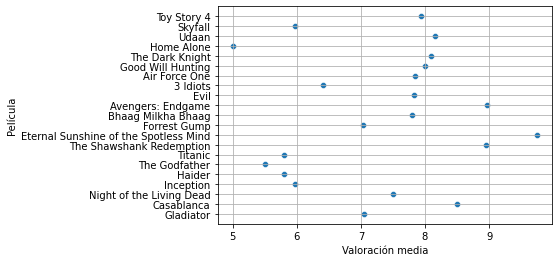

In [205]:
pelis_valoracion_general = pd.read_sql(
    """
    SELECT p.titulo, ROUND(AVG(r.rating), 2) as media_ratings
    FROM Rating r
    JOIN Pelicula p ON p.id = r.idCritica
    GROUP BY p.titulo
    """, 
    cnx
)

sns.scatterplot(x="media_ratings", y="titulo", data=pelis_valoracion_general)
plt.ylabel("Película")
plt.xlabel("Valoración media")
plt.grid()
plt.show()

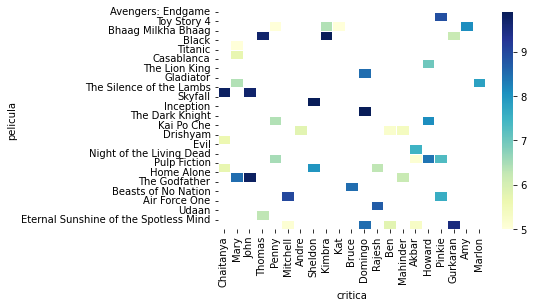

<Figure size 2160x1080 with 0 Axes>

In [209]:
criticas = pd.read_sql(
    """
    SELECT p.titulo as titulo, p.id as pelicula, c.nombre as nombre, c.id as critica, r.rating
    FROM Critica c
    JOIN Rating r ON c.id = r.idCritica
    JOIN Pelicula p ON r.idPelicula = p.id
    ORDER BY critica
    """, 
    cnx
)


def quitar_repetidos(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]



lista_criticas_nombres = criticas['nombre']
nombres_critica = quitar_repetidos(lista_criticas_nombres)


lista_peliculas_titulos = criticas['titulo']
titulos_pelicula = quitar_repetidos(lista_peliculas_titulos)


criticas = criticas.pivot("pelicula", "critica", "rating")
ax = sns.heatmap(criticas, linewidths=0.5, cmap="YlGnBu")
ax.yaxis.set_major_locator(ticker.FixedLocator([i for i in range(len(titulos_pelicula))]))
ax.set_xticklabels(nombres_critica)
plt.xticks(rotation=90)
ax.set_yticklabels(titulos_pelicula)
plt.yticks(rotation=0)
plt.figure(figsize=(30,15))
plt.show()